# EDA & Preprocessing

> 개요를 활용하면 더 편하게 이해할 수 있습니다

자료 이름: Regression_data.csv

자료 설명: 각 전복의 크기, 길이, 무게, 추정 나이에 대한 포괄적인 특성을 담은 데이터셋

## Features


Sex: 전복 성별 / object <br> F, M, I로 구성되며 I는 유아기-전복은 자웅동체이다가 성숙하면서 성별이 고정되는 경향이 있다

Length: 전복 길이 / mm / float 
<br> 껍질의 최대 길이를 의미, 하단 그림 참고

Diameter: 전복 지름 / mm / float
<br> Length를 쟀을 때와 수직으로 잴 때의 길이를 말함

Height: 전복 길이 / mm / float
<br> 높이(with meat in shell)를 말함

Whole Weight : 전복 전체 무게 / grams / float

Shucked Weight : 껍질을 제외한 무게 / grams / float

Viscra Weight : 내장 무게 / grams / float
<br> 피를 빼고 측정

Shell Weight : 껍질 무게 / grams / float
<br> 건조한 뒤 껍질의 무게

Rings : 전복 나이 / int
<br> 일반적으로 껍질의 고리(Ring)수를 통해 나이를 판단한다

특이사항
<br> 연속성을 가지는 특성(성별과 나이를 제외한)은 원 수치에 200을 나눈 값이라 한다
<br> EDA를 위해 임시로 200을 곱해 확인한다

### 참고사진
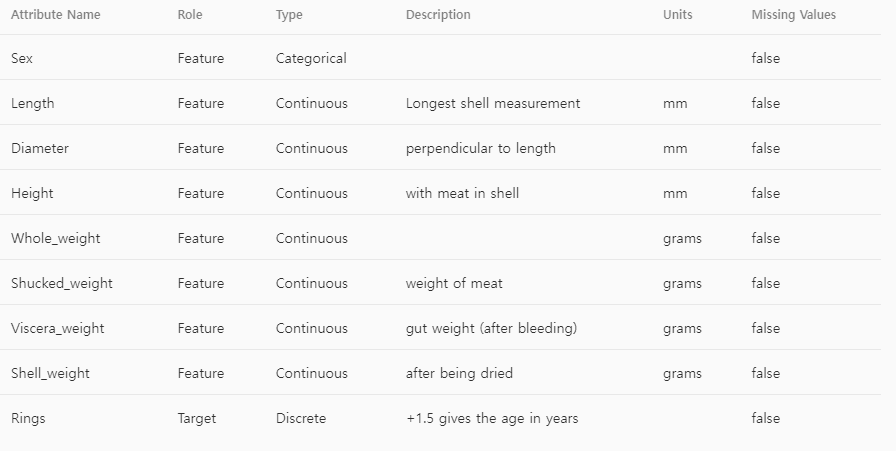 

<img src='https://i0.wp.com/briantissot.com/wp-content/uploads/2014/09/john-exact-size100.jpg?ssl=1' width ='450px' height='450px'>
<img src='http://www.lampcook.com/wi_files/food_story/seasonfood_sub_story/story4_4_1.jpg' width ='450px' height='450px'>

## 결론

## Data Structure

### 요약

- 4177 X 9

- Target feature: Rings

- 모든 특성에 결측치는 없음

- 중복값 없음

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

In [2]:
# !!!경로 설정을 위한 변수 csv_path
csv_path = 'Regression_data.csv'

df = pd.read_csv(csv_path)
display(df.head())
df.info()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## EDA

In [3]:
# 이상치를 쉽게 확인하기 위해 Continous 특성에 200 곱한 df_origin 만들기
df_origin = df.copy()
df_origin

df_origin.iloc[:, 1:8] *= 200
df_origin.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7


### Target과 Feature 시각화를 통한 경향성 확인

그래프 인사이트

1. 암수에 따른 scale 차이가 적거나 없다
2. 성별이 결정된 전복과 infant 전복 사이엔 유의미한 scale 차이가 있다

따라서 성별 범주를 성별이 고정된 것과 Infant 둘로 나누어 보는 것도 좋은 방향이 될 수 있다

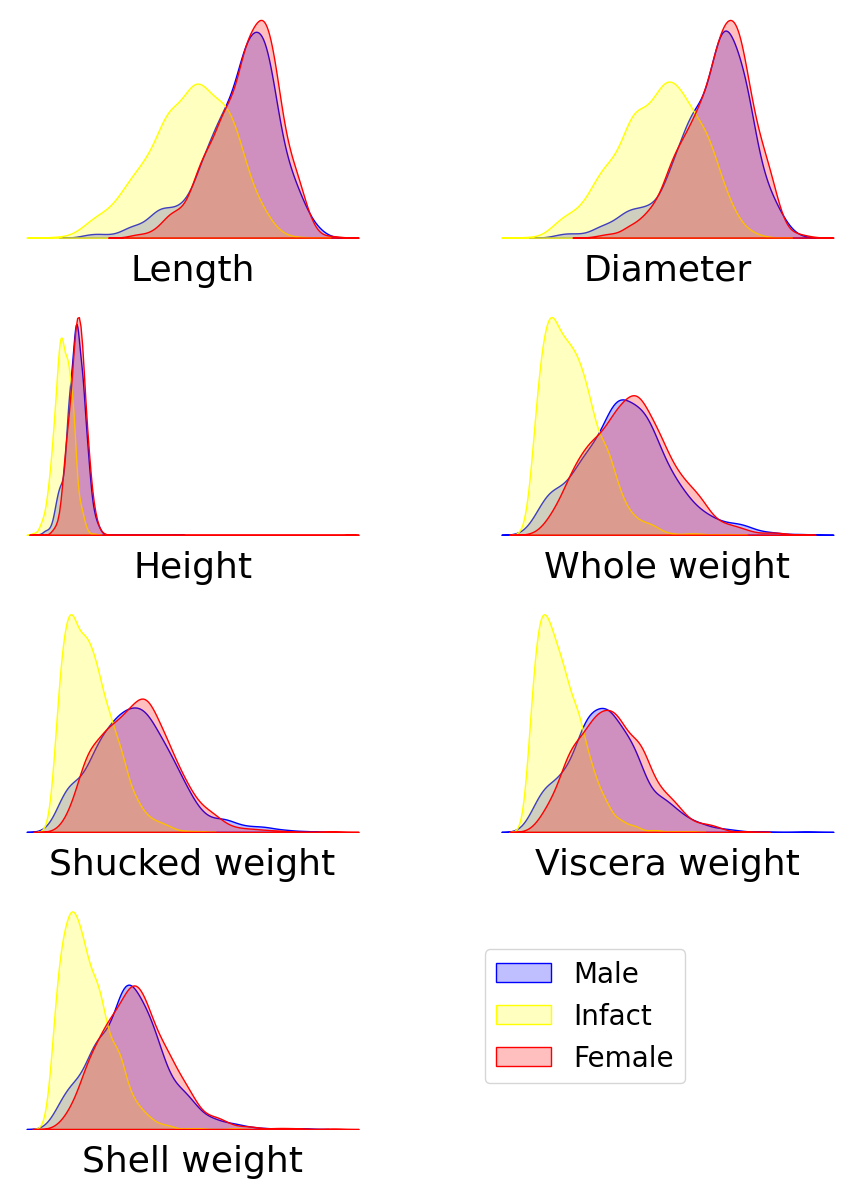

In [4]:
col_num = 2
row_num = (len(df.iloc[:,1:-1].columns) // col_num) + 1

fig = plt.figure(figsize=(col_num*6, row_num*4))
# fig.suptitle('Numeric Features by Job', fontsize = 24, fontweight = 'bold', y = 0.9)

for i, feature in enumerate(df.iloc[:,1:-1].columns) :
    ax = plt.subplot(row_num, col_num, i+1)
    g = sns.kdeplot(df[feature][df['Sex'] == 'M'], color='Blue', fill = True)
    g = sns.kdeplot(df[feature][df['Sex'] == 'I'], color='Yellow', fill= True)
    g = sns.kdeplot(df[feature][df['Sex'] == 'F'], color='Red', fill= True)
    i += 1
    plt.axis('off')
    plt.title(feature, fontsize = 26, y = -0.22)

plt.legend(['Male', 'Infact', 'Female'], loc=(1.3,0.2), fontsize=20)
plt.subplots_adjust(right=0.85, left=0.15, top=0.85, bottom=0.15, wspace=0.3, hspace=0.3)
plt.show()

히트맵 인사이트

1. Rings(나이)와 특성들은 적절한 상관관계를 가진다 - 
2. 특성들 간에 높은 상관관계가 있다 - [다중공선성](https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html)에 주의해야 한다

C:\Users\born9\AppData\Local\Temp\ipykernel_40992\2363236693.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\born9\AppData\Local\Temp\ipykernel_40992\2363236693.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


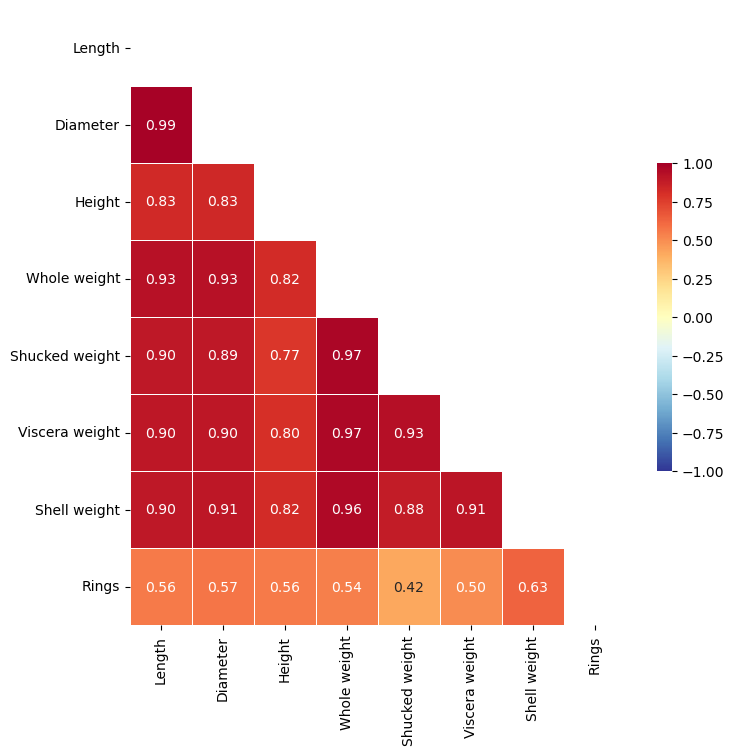

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            cmap="RdYlBu_r",
            annot=True,
            mask= mask,
            fmt='.2f',
            linewidths=.5,
            vmin = -1, vmax = 1,
            cbar_kws={"shrink": .5})

plt.show()

C:\Users\born9\AppData\Local\Temp\ipykernel_40992\64901673.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


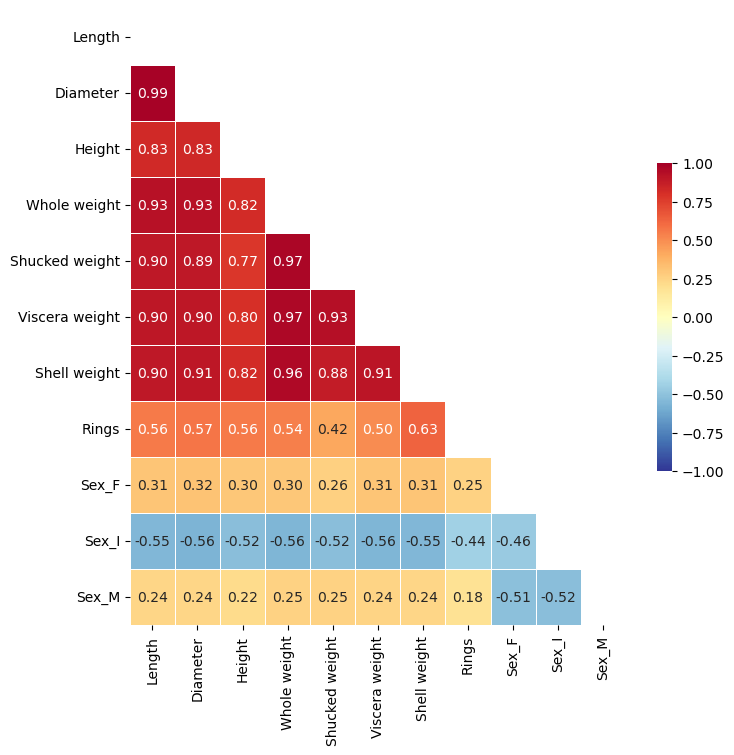

In [6]:
df_onehot=pd.get_dummies(df,columns=['Sex'])

fig, ax = plt.subplots(figsize=(8, 8))

corr = df_onehot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,
            cmap="RdYlBu_r",
            annot=True,
            mask=mask,
            fmt='.2f',
            linewidths=.5,
            vmin = -1, vmax = 1,
            cbar_kws={"shrink": .5})

plt.show()

성별 빈도 분석
- M, F, I의 빈도는 거의 동일하다

<Axes: xlabel='Sex', ylabel='count'>

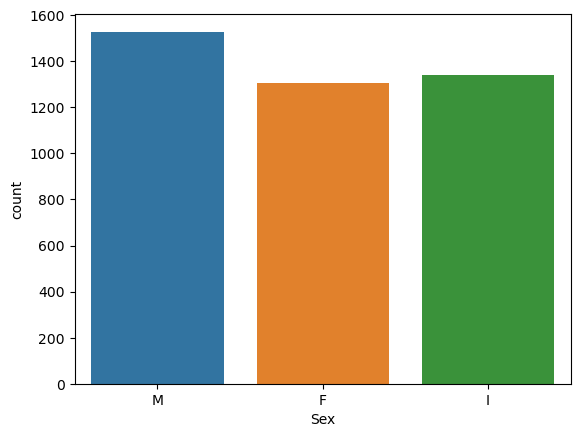

In [7]:
sns.countplot(x = 'Sex', data = df)

### Target

- Rings를 확인

#### 요약

Rings 숫자에 1.5를 더하면 전복의 나이라고 한다
<br> 조사에 쓰인 전복이 무슨 종인지 나와있지 않으며 평균 수명 15~20년 이상의 장수종도 있다고 한다
<br> 따라서 Rings values 중 이상치는 없다고 판단했다

In [8]:
# Length 확인
df_sorted_by_ring_asc = df_origin.sort_values(by='Rings', ascending=True)
df_sorted_by_ring_desc = df_origin.sort_values(by='Rings', ascending=False)

print("Target으로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_ring_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_ring_desc.head(10))

Target으로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2
520,M,42.0,30.0,10.0,7.7,3.1,1.7,2.0,3
3521,I,43.0,30.0,11.0,8.2,3.0,1.8,2.5,3
306,I,33.0,24.0,6.0,4.3,1.4,1.0,1.0,3
1054,I,39.0,30.0,9.0,7.5,3.6,1.2,2.2,3
894,I,48.0,35.0,13.0,13.3,6.2,2.7,3.4,3
720,I,32.0,22.0,5.0,3.6,1.3,1.1,1.0,3
3801,I,41.0,31.0,9.0,9.9,4.7,2.2,2.8,3
2371,M,36.0,25.0,10.0,4.6,1.7,1.1,2.0,3



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
480,F,140.0,117.0,37.0,361.5,141.1,64.3,95.0,29
2209,F,110.0,93.0,36.0,242.5,64.9,41.0,105.0,27
2108,M,133.0,107.0,45.0,436.7,150.7,78.2,177.0,27
294,M,120.0,99.0,39.0,211.5,76.8,38.0,75.0,26
2201,F,129.0,98.0,43.0,281.2,85.3,45.7,102.0,25
3149,F,140.0,108.0,43.0,395.6,133.5,62.5,142.0,24
3280,M,138.0,108.0,37.0,323.9,106.6,70.6,111.0,24
314,M,126.0,97.0,35.0,260.0,86.7,58.9,92.0,23
313,F,124.0,94.0,40.0,245.1,76.2,54.0,87.0,23
2305,F,110.0,83.0,27.0,155.0,60.4,35.8,52.0,23


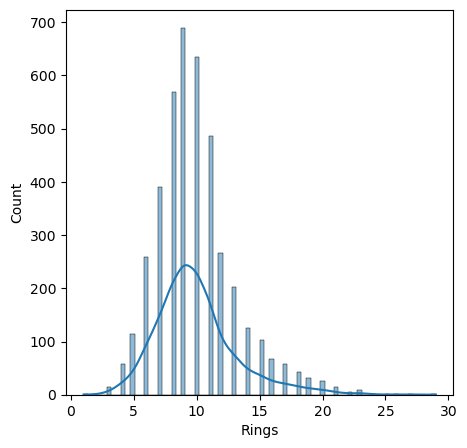

"\nif save_mode:\n    fig.savefig(save_path + 'abalone_target.png', dpi=80, bbox_inches='tight')\n"

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(df.Rings, kde=True)
plt.show()
"""
if save_mode:
    fig.savefig(save_path + 'abalone_target.png', dpi=80, bbox_inches='tight')
"""

### Features

- Height 특성에서 이상치 4개 발견(1257, 3996, 2051, 1417)

- Vaicera weight 특성에서 이상치 1개 발견(3552)

- 이상치를 가진 행들 모두 상관관계가 높은 특성을 이용해 이상치를 대체했다

In [10]:
df_origin.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,NaN,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,NaN,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,NaN,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,NaN,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,NaN,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000


In [11]:
# 중복값 없음
df_origin.duplicated().value_counts()

False    4177
dtype: int64

이상치로 보이는 값들이 특성마다 여럿 발견됨. 체크해볼 필요가 있음. 특성 순서대로 정렬해 확인하겠음


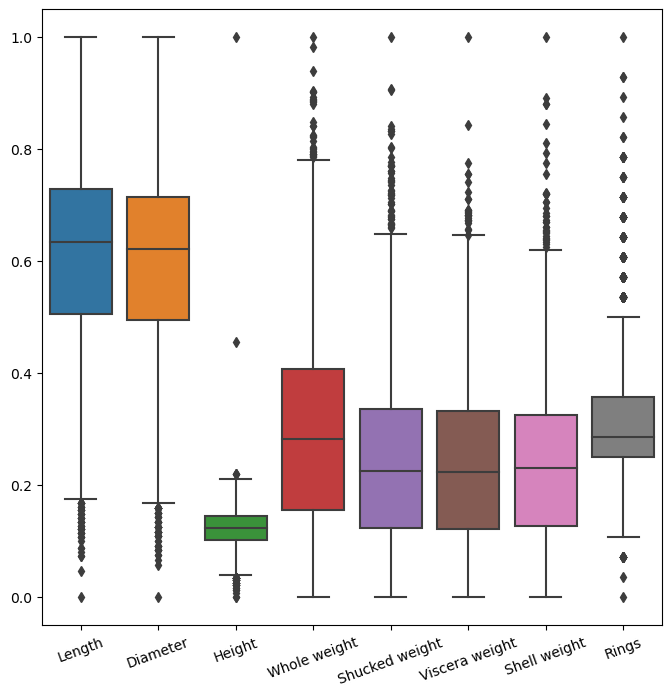

In [12]:
# 박스플롯을 그리기위한 MinMaxScaler
df_scaled = df[df.columns[1:]].copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled.describe(include="all")

# 박스플롯 그리기
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df_scaled)
ax.set_xticklabels(list(df_scaled.columns), rotation=20)

print('이상치로 보이는 값들이 특성마다 여럿 발견됨. 체크해볼 필요가 있음. 특성 순서대로 정렬해 확인하겠음')

In [13]:
# Minmaxscaler를 해야 하는 이유는 이걸 돌려보면 알 수 있습니다
"""
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(df)
ax.set_xticklabels(list(df.columns), rotation=20)
"""

'\nfig, ax = plt.subplots(figsize=(8, 8))\nsns.boxplot(df)\nax.set_xticklabels(list(df.columns), rotation=20)\n'

#### Length(문제 없음)

In [14]:
# Length 확인
df_sorted_by_length_asc = df_origin.sort_values(by='Length', ascending=True)
df_sorted_by_length_desc = df_origin.sort_values(by='Length', ascending=False)

print("Length로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_length_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_length_desc.head(10))

# 236번은 가능하다고 보기에 이상치 없다고 판단 

Length로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
2114,I,26.0,19.0,7.0,2.1,1.0,1.3,0.7,4
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
1986,I,27.0,26.0,8.0,5.8,2.5,1.3,1.6,4
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
3899,I,28.0,21.0,7.0,2.9,1.0,0.7,1.0,4
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2
2381,M,31.0,23.0,5.0,4.8,1.8,1.0,1.5,5
696,I,31.0,21.0,10.0,3.5,1.0,0.7,1.0,4



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1428,F,163.0,130.0,50.0,451.0,178.1,84.0,159.5,14
2334,F,160.0,126.0,39.0,505.2,186.6,118.0,124.0,23
1209,F,156.0,126.0,43.0,531.4,297.6,99.7,117.2,11
3715,M,156.0,120.0,42.0,509.6,238.9,114.9,134.9,11
2090,M,155.0,114.0,44.0,406.4,147.0,95.1,131.7,17
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
4148,M,154.0,121.0,35.0,410.1,160.1,105.2,71.0,11
2625,M,154.0,120.0,43.0,438.9,210.3,96.4,116.8,10
1762,M,154.0,124.0,39.0,503.1,223.1,128.3,128.4,12
2624,M,153.0,117.0,36.0,479.6,225.6,102.4,106.7,12


#### Diameter(문제 없음)

In [15]:
df_sorted_by_diameter_asc = df_origin.sort_values(by='Diameter', ascending=True)
df_sorted_by_diameter_desc = df_origin.sort_values(by='Diameter', ascending=False)

print("Diameter로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_diameter_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_diameter_desc.head(10))

# 이상치 없다고 판단

Diameter로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
2114,I,26.0,19.0,7.0,2.1,1.0,1.3,0.7,4
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
3899,I,28.0,21.0,7.0,2.9,1.0,0.7,1.0,4
3837,I,34.0,21.0,7.0,6.8,2.4,1.7,1.0,4
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
696,I,31.0,21.0,10.0,3.5,1.0,0.7,1.0,4
526,M,31.0,22.0,8.0,3.1,1.3,0.6,1.0,3



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1428,F,163.0,130.0,50.0,451.0,178.1,84.0,159.5,14
1209,F,156.0,126.0,43.0,531.4,297.6,99.7,117.2,11
2334,F,160.0,126.0,39.0,505.2,186.6,118.0,124.0,23
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
1207,F,151.0,125.0,42.0,501.0,239.3,102.6,135.7,11
1762,M,154.0,124.0,39.0,503.1,223.1,128.3,128.4,12
3008,F,150.0,123.0,41.0,452.7,164.2,84.6,145.2,12
1427,F,150.0,122.0,47.0,501.7,246.4,103.8,122.4,14
4148,M,154.0,121.0,35.0,410.1,160.1,105.2,71.0,11
3427,M,148.0,121.0,40.0,498.5,229.1,115.0,104.7,13


#### Height

In [16]:
df_sorted_by_height_asc = df_origin.sort_values(by='Height', ascending=True)
df_sorted_by_height_desc = df_origin.sort_values(by='Height', ascending=False)

print("Height로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_height_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_height_desc.head(10))

Height로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3996,I,63.0,46.0,0.0,26.8,11.5,5.7,70.1,6
1257,I,86.0,68.0,0.0,85.6,41.3,17.2,23.0,8
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
2169,I,33.0,23.0,3.0,2.9,1.1,0.6,1.0,4
1174,F,127.0,99.0,3.0,231.3,102.3,61.6,57.7,9
3902,I,32.0,24.0,4.0,3.6,1.5,0.9,1.0,4
694,I,33.0,22.0,4.0,3.8,1.3,0.5,1.0,4
1987,I,32.0,22.0,5.0,3.9,1.5,1.0,1.2,4
2381,M,31.0,23.0,5.0,4.8,1.8,1.0,1.5,5
3190,I,40.0,29.0,5.0,6.9,2.2,1.5,2.0,5



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2051,F,91.0,71.0,226.0,118.8,66.4,23.2,26.7,8
1417,M,141.0,113.0,103.0,442.0,221.5,97.3,102.4,10
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
1428,F,163.0,130.0,50.0,451.0,178.1,84.0,159.5,14
2179,F,119.0,94.0,50.0,256.6,92.4,49.5,89.0,14
307,M,129.0,103.0,48.0,308.3,94.2,73.8,107.0,13
1528,M,145.0,115.0,48.0,442.0,270.2,82.6,100.3,13
277,M,122.0,100.0,48.0,328.4,106.4,66.9,138.0,18
2161,F,143.0,113.0,48.0,439.9,144.9,93.0,177.0,17
3993,M,144.0,120.0,47.0,447.7,196.8,82.2,124.2,12


##### height에서 이상치 네개 발견(3996, 1257, 2051, 1417)

오름차순에 1257번, 3996번의 heigth value가 0이다

아주 어린 성채라면 가능할 수 있지만 둘다 ring value가 6 이상이며 height 이외의 feature는 정상적이다

따라서 3996번, 1257번의 height는 이상치이다, height value만 대체해 쓰는 것이 좋을 것으로 보인다

<br>


Height와 상관관계가 가장 높은 특성은 Length와 Diameter인데 이 중 Diameter가 같은 값들의 height 평균으로 이상치를 대체하겠다

Diameter가 같은 행이 Length가 같은 행보다 많기 때문이다

In [17]:
# 3996
df_origin_3996 = df_origin[df_origin['Diameter'] == 46.0]
display(df_origin_3996.head(10))
df_origin.iloc[3996]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
136,F,61.0,46.0,16.0,31.2,13.5,6.9,9.6,7
243,I,60.0,46.0,16.0,25.5,8.7,5.3,8.0,8
518,M,65.0,46.0,18.0,29.4,12.0,6.8,9.0,4
537,M,58.0,46.0,15.0,23.3,8.6,5.1,8.0,7
695,I,63.0,46.0,18.0,25.7,8.6,8.0,8.0,7
899,I,59.0,46.0,16.0,32.5,13.0,10.0,7.7,5
901,I,60.0,46.0,19.0,27.7,11.2,7.3,7.4,6
904,I,63.0,46.0,14.0,28.8,10.6,6.1,8.0,8
1217,I,63.0,46.0,16.0,27.5,10.9,6.2,8.9,5
1218,I,63.0,46.0,14.0,22.9,9.2,4.7,7.7,5


Sex                  I
Length            63.0
Diameter          46.0
Height             0.0
Whole weight      26.8
Shucked weight    11.5
Viscera weight     5.7
Shell weight      70.1
Rings                6
Name: 3996, dtype: object

In [18]:
# Length 63인 행 선택 후 이상치행 제거
selected_rows = df_origin[df_origin['Diameter'] == 46.0]
selected_rows_removed = selected_rows.drop(3996)

# Height 값 평균을 구하고 이상치 값 대체
df_origin.loc[3996, 'Height'] = selected_rows_removed['Height'].mean()

In [19]:
# 1257
df_origin_1257 = df_origin[df_origin['Diameter'] == 68.0]
display(df_origin_1257.head(10))
df_origin.iloc[1257]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
17,F,88.0,68.0,20.0,90.2,37.6,17.4,26.0,10
117,M,88.0,68.0,21.0,80.4,26.1,19.1,33.0,10
205,F,88.0,68.0,28.0,96.4,37.2,21.7,32.0,9
207,I,87.0,68.0,22.0,75.9,29.9,17.0,24.0,8
472,I,86.0,68.0,24.0,71.5,30.2,12.9,20.9,9
560,F,88.0,68.0,21.0,72.8,29.6,16.1,23.5,8
631,F,86.0,68.0,24.0,78.2,31.1,19.0,28.1,7
644,M,90.0,68.0,26.0,74.3,32.1,15.9,21.0,9
662,F,83.0,68.0,26.0,73.5,29.2,17.7,24.0,10
773,M,91.0,68.0,27.0,92.4,33.5,31.6,24.0,9


Sex                  I
Length            86.0
Diameter          68.0
Height             0.0
Whole weight      85.6
Shucked weight    41.3
Viscera weight    17.2
Shell weight      23.0
Rings                8
Name: 1257, dtype: object

In [20]:
selected_rows = df_origin[df_origin['Diameter'] == 68.0]
selected_rows_removed = selected_rows.drop(1257)

df_origin.loc[1257, 'Height'] = selected_rows_removed['Height'].mean()


내림차순에서 2051번, 1417번의 height는 weight를 고려할 때 명백한 이상치이다 

2051번의 다른 특성값의 타당성을 확인하기 위해 Diameter가 71인 행들만 배열해본다

In [21]:
print("\n 내림차순:")
display(df_sorted_by_height_desc.head(10))


 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2051,F,91.0,71.0,226.0,118.8,66.4,23.2,26.7,8
1417,M,141.0,113.0,103.0,442.0,221.5,97.3,102.4,10
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
1428,F,163.0,130.0,50.0,451.0,178.1,84.0,159.5,14
2179,F,119.0,94.0,50.0,256.6,92.4,49.5,89.0,14
307,M,129.0,103.0,48.0,308.3,94.2,73.8,107.0,13
1528,M,145.0,115.0,48.0,442.0,270.2,82.6,100.3,13
277,M,122.0,100.0,48.0,328.4,106.4,66.9,138.0,18
2161,F,143.0,113.0,48.0,439.9,144.9,93.0,177.0,17
3993,M,144.0,120.0,47.0,447.7,196.8,82.2,124.2,12


In [22]:
df_origin_2051 = df_origin[df_origin['Diameter'] == 71.0]
display(df_origin_2051.head(10))
df_origin.iloc[2051]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
14,F,94.0,71.0,20.0,95.1,33.5,16.1,37.0,10
35,M,93.0,71.0,21.0,95.9,45.4,24.8,25.0,8
37,F,90.0,71.0,21.0,104.5,47.4,23.3,29.0,8
65,M,95.0,71.0,24.0,96.0,46.8,20.3,27.0,8
88,F,92.0,71.0,26.0,103.4,44.1,22.8,33.0,9
223,F,89.0,71.0,30.0,97.0,36.2,25.0,31.0,11
282,F,91.0,71.0,24.0,89.9,35.4,20.8,30.0,9
288,M,88.0,71.0,25.0,95.5,26.4,16.3,38.0,9
315,I,90.0,71.0,22.0,91.7,38.8,13.4,28.0,8
406,M,90.0,71.0,23.0,95.8,42.5,20.9,30.0,8


Sex                   F
Length             91.0
Diameter           71.0
Height            226.0
Whole weight      118.8
Shucked weight     66.4
Viscera weight     23.2
Shell weight       26.7
Rings                 8
Name: 2051, dtype: object

2051번은 Height value를 제외한 특성값에 문제가 없어보인다, 2051번은 Height value만 조정해주면 될것으로 사료됨

In [23]:
# Diameter 71인 행 선택 후 이상치행 제거
selected_rows = df_origin[df_origin['Diameter'] == 71.0]
selected_rows_removed = selected_rows.drop(2051)

# Height 값 평균을 구하고 이상치 값 대체
df_origin.loc[2051, 'Height'] = selected_rows_removed['Height'].mean()

1417번 역시 height value를 제외한 특성값에 문제가 없으나 동일한 diameter를 갖는 데이터가 거의 없어 Length가 같은 개체들의 평균으로 대체한다

In [24]:
selected_rows = df_origin[df_origin['Length'] == 141.0]
selected_rows_removed = selected_rows.drop(1417)
df_origin.loc[1417, 'Height'] = selected_rows_removed['Height'].mean()

#### Whole weight(문제 없음)

In [25]:
df_sorted_by_ww_asc = df_origin.sort_values(by='Whole weight', ascending=True)
df_sorted_by_ww_desc = df_origin.sort_values(by='Whole weight', ascending=False)

print("Whole weight로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_ww_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_ww_desc.head(10))

# 이상치 없다고 판단

Whole weight로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
2114,I,26.0,19.0,7.0,2.1,1.0,1.3,0.7,4
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
3899,I,28.0,21.0,7.0,2.9,1.0,0.7,1.0,4
2169,I,33.0,23.0,3.0,2.9,1.1,0.6,1.0,4
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2
526,M,31.0,22.0,8.0,3.1,1.3,0.6,1.0,3
696,I,31.0,21.0,10.0,3.5,1.0,0.7,1.0,4



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
891,M,146.0,119.0,46.0,565.1,229.3,83.8,179.4,17
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
1209,F,156.0,126.0,43.0,531.4,297.6,99.7,117.2,11
1051,F,147.0,120.0,44.0,511.0,226.7,88.0,120.0,11
165,M,145.0,114.0,38.0,510.0,214.1,96.6,145.0,14
3715,M,156.0,120.0,42.0,509.6,238.9,114.9,134.9,11
2334,F,160.0,126.0,39.0,505.2,186.6,118.0,124.0,23
1762,M,154.0,124.0,39.0,503.1,223.1,128.3,128.4,12
1427,F,150.0,122.0,47.0,501.7,246.4,103.8,122.4,14
1207,F,151.0,125.0,42.0,501.0,239.3,102.6,135.7,11


#### Shucked weight(문제 없음)

In [26]:
df_sorted_by_sw_asc = df_origin.sort_values(by='Shucked weight', ascending=True)
df_sorted_by_sw_desc = df_origin.sort_values(by='Shucked weight', ascending=False)

print("Shucked weight로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_sw_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_sw_desc.head(10))

# 이상치 없다고 판단

Shucked weight로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
3899,I,28.0,21.0,7.0,2.9,1.0,0.7,1.0,4
696,I,31.0,21.0,10.0,3.5,1.0,0.7,1.0,4
2114,I,26.0,19.0,7.0,2.1,1.0,1.3,0.7,4
2169,I,33.0,23.0,3.0,2.9,1.1,0.6,1.0,4
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
694,I,33.0,22.0,4.0,3.8,1.3,0.5,1.0,4



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1209,F,156.0,126.0,43.0,531.4,297.6,99.7,117.2,11
1528,M,145.0,115.0,48.0,442.0,270.2,82.6,100.3,13
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
2811,M,145.0,114.0,38.0,466.1,250.6,108.2,104.0,9
3713,M,142.0,111.0,35.0,428.0,249.1,74.5,86.8,11
3007,M,146.0,117.0,45.0,446.1,247.9,84.4,112.6,14
3599,M,147.0,111.0,44.0,466.6,247.9,72.9,123.9,12
1427,F,150.0,122.0,47.0,501.7,246.4,103.8,122.4,14
1207,F,151.0,125.0,42.0,501.0,239.3,102.6,135.7,11
3715,M,156.0,120.0,42.0,509.6,238.9,114.9,134.9,11


#### Viscera weight

In [27]:
df_sorted_by_vw_asc = df_origin.sort_values(by='Viscera weight', ascending=True)
df_sorted_by_vw_desc = df_origin.sort_values(by='Viscera weight', ascending=False)

print("Viscera weight로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_vw_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_vw_desc.head(10))

Viscera weight로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3522,I,48.0,37.0,12.0,13.1,5.9,0.1,4.0,4
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
694,I,33.0,22.0,4.0,3.8,1.3,0.5,1.0,4
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
526,M,31.0,22.0,8.0,3.1,1.3,0.6,1.0,3
2169,I,33.0,23.0,3.0,2.9,1.1,0.6,1.0,4
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
696,I,31.0,21.0,10.0,3.5,1.0,0.7,1.0,4
465,I,35.0,25.0,10.0,4.7,1.6,0.7,1.6,5



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1763,M,155.0,126.0,50.0,555.9,269.7,152.0,115.6,12
1762,M,154.0,124.0,39.0,503.1,223.1,128.3,128.4,12
2334,F,160.0,126.0,39.0,505.2,186.6,118.0,124.0,23
3427,M,148.0,121.0,40.0,498.5,229.1,115.0,104.7,13
3715,M,156.0,120.0,42.0,509.6,238.9,114.9,134.9,11
1422,M,144.0,115.0,43.0,434.6,190.3,112.8,107.3,12
1204,M,147.0,117.0,37.0,424.8,190.4,110.0,100.0,11
2811,M,145.0,114.0,38.0,466.1,250.6,108.2,104.0,9
170,M,139.0,110.0,43.0,391.3,142.5,108.2,118.0,14
2709,F,148.0,115.0,44.0,402.4,178.3,105.3,94.2,12


##### 이상치 하나 발견(3522번)

3522번 또한 Viscera weight value에만 문제가 있다, 나머지 특성값은 타당한 것으로 보인다

Viscera weight와 가장 상관관계가 높은 Whole weight를 기준으로 이상치를 대체하는데 겹치는 값이 없고 동일한 값을 가지는 경우가 흔치 않다

따라서 Whole weight가 12보다 크고 14보다 작은 개체들의 Viscera weight 평균으로 이상치를 대체한다

In [28]:
# 3522번과 Length가 같은 행들과 비교
condition = (df_origin['Whole weight'] > 12.0) & (df_origin['Whole weight'] < 14.0)
df_origin_3522 = df_origin[condition]
display(df_origin_3522.tail(10))
df_origin.iloc[3522]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1059,I,50.0,36.0,13.0,13.7,4.9,3.1,4.5,5
1212,I,50.0,37.0,13.0,13.7,5.9,2.8,4.5,5
2193,I,43.0,34.0,11.0,12.1,4.1,2.8,4.0,6
2455,I,47.0,34.0,13.0,12.5,4.6,2.8,4.4,6
2547,I,46.0,36.0,10.0,12.8,4.3,2.7,4.0,5
2713,I,50.0,35.0,12.0,12.7,5.5,1.6,4.0,4
3522,I,48.0,37.0,12.0,13.1,5.9,0.1,4.0,4
3906,M,49.0,36.0,13.0,12.7,4.9,2.7,4.0,4
3934,I,47.0,35.0,16.0,12.9,4.3,3.5,4.3,5
3945,I,47.0,35.0,13.0,12.3,4.1,4.0,3.8,6


Sex                  I
Length            48.0
Diameter          37.0
Height            12.0
Whole weight      13.1
Shucked weight     5.9
Viscera weight     0.1
Shell weight       4.0
Rings                4
Name: 3522, dtype: object

In [29]:
# Length 3522인 행 선택 후 이상치행 제거
selected_rows = df_origin[condition]
selected_rows_removed = selected_rows.drop(3522)

# Height 값 평균을 구하고 이상치 값 대체
df_origin.loc[3522, 'Height'] = selected_rows_removed['Height'].mean()

#### Shell weight(문제 없음)

In [30]:
df_sorted_by_shw_asc = df_origin.sort_values(by='Shell weight', ascending=True)
df_sorted_by_shw_desc = df_origin.sort_values(by='Shell weight', ascending=False)

print("Shell weight로 정렬된 데이터프레임 (오름차순):")
display(df_sorted_by_shw_asc.head(10))

print("\n 내림차순:")
display(df_sorted_by_shw_desc.head(10))

# 이상치 없음

Shell weight로 정렬된 데이터프레임 (오름차순):


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,15.0,11.0,2.0,0.4,0.2,0.1,0.3,1
238,I,22.0,18.0,6.0,1.6,0.5,0.4,0.6,3
2114,I,26.0,19.0,7.0,2.1,1.0,1.3,0.7,4
1429,I,28.0,21.0,7.0,2.8,1.1,0.5,0.8,3
237,I,26.0,20.0,6.0,2.6,0.9,0.6,0.8,3
2169,I,33.0,23.0,3.0,2.9,1.1,0.6,1.0,4
3902,I,32.0,24.0,4.0,3.6,1.5,0.9,1.0,4
3899,I,28.0,21.0,7.0,2.9,1.0,0.7,1.0,4
720,I,32.0,22.0,5.0,3.6,1.3,1.1,1.0,3
719,I,30.0,20.0,5.0,3.0,0.9,0.8,1.0,2



 내림차순:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
163,F,145.0,112.0,42.0,428.2,130.0,79.6,201.0,18
891,M,146.0,119.0,46.0,565.1,229.3,83.8,179.4,17
2161,F,143.0,113.0,48.0,439.9,144.9,93.0,177.0,17
2108,M,133.0,107.0,45.0,436.7,150.7,78.2,177.0,27
166,F,145.0,115.0,35.0,424.8,153.0,90.3,170.0,20
164,F,130.0,109.0,46.0,350.4,112.1,57.9,163.0,16
1428,F,163.0,130.0,50.0,451.0,178.1,84.0,159.5,14
129,M,142.0,108.0,33.0,391.8,153.3,52.2,156.0,18
168,M,141.0,112.0,44.0,396.2,163.5,61.7,152.0,14
3008,F,150.0,123.0,41.0,452.7,164.2,84.6,145.2,12


#### 전처리 데이터셋 저장

In [31]:
# 다시 200으로 나눠 원본 형태로 되돌리기
df_clean = df_origin.copy()

df_clean.iloc[:, 1:8] /= 200
df_clean.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
# 데이터셋 저장
df_clean.to_csv('abalone_clean.csv', index = False)

## ML Model Predict

- 아래 결과는 원본 데이터를 이용해 진행함, 새로운 데이터셋을 학습시킬 땐 csv_path 변수를 새로 선언할 것

- 레거시 모델 성능
<br>Epoch : 10 , lr : 0.001
<br>Train Loss / Accuracy : 5.863 / 0.824 - Loss는 MSE를 말함
<br>Test Accuracy : 0.827



- Linear Regression, Random Forest, Gradient Boosting 사용해 성능을 비교한다

In [33]:
# 전복 accuracy 구하는 함수
def get_Accuracy(y, y_pred):
    mdiff = (np.abs((y_pred - y) / y)).mean()
    acc = 1 - mdiff

    return acc

In [34]:
def load_dataset1(csv_path, TRAIN_RATIO=0.8):
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)

    # 성별 원핫 인코딩
    df=pd.get_dummies(df,columns=['Sex'])
    
    # 학습 데이터 분리
    X = df.drop('Rings', axis=1)
    y = df['Rings'].astype('float32')
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
    
    # MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = load_dataset1(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

def get_metrics(model, X, y, cv_n=3):
    y_pred=model.predict(X)
    
    r2 = metrics.r2_score(y, y_pred)
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    acc = get_Accuracy(y, y_pred)

    print('r2_score                 :', r2)
    print('Mean Absolute Error      :', mae)
    print('Mean Squared Error       :', mse)
    print('Root Mean Squared Error  :', rmse)
    print('Acc is', acc)
    return r2, mae, mse, rmse

(3341, 10) (836, 10) (3341,) (836,)


In [35]:
# Data size 및 원핫인코딩 상태 확인
display(X_train.info())
X_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3341 non-null   float64
 1   Diameter        3341 non-null   float64
 2   Height          3341 non-null   float64
 3   Whole weight    3341 non-null   float64
 4   Shucked weight  3341 non-null   float64
 5   Viscera weight  3341 non-null   float64
 6   Shell weight    3341 non-null   float64
 7   Sex_F           3341 non-null   float64
 8   Sex_I           3341 non-null   float64
 9   Sex_M           3341 non-null   float64
dtypes: float64(10)
memory usage: 261.1 KB


None

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.673759,0.669643,0.150442,0.354862,0.258499,0.294273,0.261477,1.0,0.0,0.0
1,0.652482,0.589286,0.123894,0.312647,0.278357,0.216590,0.246507,0.0,0.0,1.0
2,0.723404,0.732143,0.132743,0.463648,0.399529,0.412113,0.350299,1.0,0.0,0.0
3,0.496454,0.455357,0.101770,0.149197,0.125884,0.133641,0.107784,0.0,1.0,0.0
4,0.822695,0.839286,0.190265,0.617355,0.456075,0.393022,0.466068,1.0,0.0,0.0


#### Base Model

평균 기준 모델

In [36]:
# Base Model : 평균
y_mean = np.mean(y_train)
y_pred = [y_mean] * len(y_train)

print('r2_score                 :', metrics.r2_score(y_train, y_pred))
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error       :', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Acc is', get_Accuracy(y_train, y_pred))

r2_score                 : 0.0
Mean Absolute Error      : 2.3791044
Mean Squared Error       : 10.569288
Root Mean Squared Error  : 3.2510443
Acc is 461     0.999949
2835    0.999927
1378    0.999999
2569    0.999803
369     0.999876
          ...   
4173    0.999999
3328    0.999930
3879    0.999899
3607    0.999927
2130    0.999968
Name: Rings, Length: 3341, dtype: float32


### Linear Regression

In [37]:
model_ln=LinearRegression() # initialzing the model
model_ln.fit(X_train, y_train)

ln_r2_train, ln_mae_train, ln_mse_train, ln_rmse_train = get_metrics(model_ln, X_train, y_train)
print('='*100)
ln_r2_test, ln_mae_test, ln_mse_test, ln_rmse_test = get_metrics(model_ln, X_test, y_test)

r2_score                 : 0.5422942501234691
Mean Absolute Error      : 1.5798670869500149
Mean Squared Error       : 4.837624251574893
Root Mean Squared Error  : 2.1994599909011514
Acc is 461     0.999996
2835    0.999929
1378    0.999990
2569    0.999911
369     0.999969
          ...   
4173    0.999999
3328    0.999941
3879    0.999907
3607    0.999980
2130    0.999952
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.5147977709368294
Mean Absolute Error      : 1.5990019437799043
Mean Squared Error       : 4.696251244065865
Root Mean Squared Error  : 2.167083580313843
Acc is 2197    0.999749
3662    0.999703
1266    0.999897
485     0.999910
2083    0.999899
          ...   
1565    0.999817
2833    0.999969
4005    0.999937
3318    0.999416
2865    0.999229
Name: Rings, Length: 836, dtype: float64


### Random Forest Regression

In [38]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

rf_r2_train, rf_mae_train, rf_mse_train, rf_rmse_train = get_metrics(model_rf, X_train, y_train)
print('='*100)
rf_r2_test, rf_mae_test, rf_mse_test, rf_rmse_test = get_metrics(model_rf, X_test, y_test)

r2_score                 : 0.937019350720329
Mean Absolute Error      : 0.5740706375336725
Mean Squared Error       : 0.6656606704579469
Root Mean Squared Error  : 0.8158803040017248
Acc is 461     0.999982
2835    0.999982
1378    0.999998
2569    0.999967
369     0.999974
          ...   
4173    0.999991
3328    0.999991
3879    0.999967
3607    0.999994
2130    0.999968
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.4953896053544604
Mean Absolute Error      : 1.5694138755980864
Mean Squared Error       : 4.884102033492823
Root Mean Squared Error  : 2.2100004600662015
Acc is 2197    0.999794
3662    0.999803
1266    0.999888
485     0.999964
2083    0.999905
          ...   
1565    0.999814
2833    0.999947
4005    0.999983
3318    0.999827
2865    0.999279
Name: Rings, Length: 836, dtype: float64


### Gradient Boosting Regression

In [39]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

gb_r2_train, gb_mae_train, gb_mse_train, gb_rmse_train = get_metrics(model_gb, X_train, y_train)
print('='*100)
gb_r2_test, gb_mae_test, gb_mse_test, gb_rmse_test = get_metrics(model_gb, X_test, y_test)

r2_score                 : 0.666253357717951
Mean Absolute Error      : 1.3486481790902445
Mean Squared Error       : 3.5274646451805847
Root Mean Squared Error  : 1.8781545850064059
Acc is 461     0.999984
2835    0.999944
1378    0.999987
2569    0.999922
369     0.999933
          ...   
4173    0.999998
3328    0.999982
3879    0.999903
3607    0.999990
2130    0.999962
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.5280013079216868
Mean Absolute Error      : 1.5291889949651103
Mean Squared Error       : 4.568454784616514
Root Mean Squared Error  : 2.137394391453415
Acc is 2197    0.999776
3662    0.999751
1266    0.999884
485     0.999922
2083    0.999955
          ...   
1565    0.999829
2833    0.999965
4005    0.999957
3318    0.999728
2865    0.999307
Name: Rings, Length: 836, dtype: float64


### MSE 성능
Gradient Boosting > Linear Regression > Base (Random Forest는 과적합이 크게 발생함)

전체적으로 추가적인 특성을 만들었을 때보다 좋은 성능을 보였음

## Feature Importance

Shell weight와 Shucked weight가 Ring 예측에 중요한 특성으로 나타났다
<br> PCA를 사용할 경우 전체적으로 R2가 더 개선되고
<br> 사용하지 않을 경우 MSE가 더 개선된다

이번 과제의 성능 평가 지표 중 하나가 MSE임을 고려해 모델을 구성해야 한다

          feature       MDI
6    Shell weight  0.496591
4  Shucked weight  0.162918
3    Whole weight  0.083936
5  Viscera weight  0.068327
1        Diameter  0.055862
0          Length  0.051278
2          Height  0.051212
8           Sex_I  0.017498
7           Sex_F  0.006247
9           Sex_M  0.006131


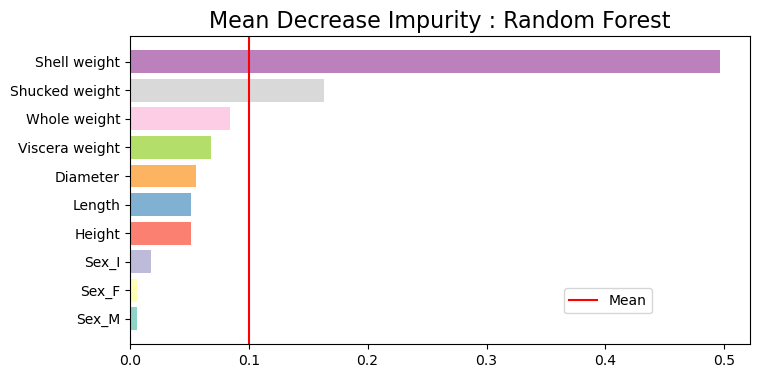

In [40]:
# Mean Decrease Impurity
MDI_rf = pd.DataFrame({ 'feature':X_test.columns, 'MDI':model_rf.feature_importances_}).sort_values(by='MDI', ascending=True)
print(MDI_rf.sort_values(by='MDI', ascending=False))

# Graph
fig = plt.figure(figsize=(8, 4))
plt.title('Mean Decrease Impurity : Random Forest', fontsize=16)
plt.barh(MDI_rf.feature, MDI_rf.MDI, color=sns.color_palette('Set3'))
plt.axvline(MDI_rf.MDI.mean(), color="red", label="Mean")
plt.legend(fontsize=10, loc=(0.7, 0.1))

plt.show()

In [41]:
def load_dataset(csv_path, TRAIN_RATIO=0.8):
    
    global X, y, df
    
    # 데이터셋 로드
    df = pd.read_csv(csv_path)
    
    # 성별 원핫 인코딩
    df=pd.get_dummies(df,columns=['Sex'])
    
    # 학습 데이터 분리
    X = df.drop('Rings', axis=1)
    y = df['Rings'].astype('float32')

load_dataset(csv_path)

def pca_data(data):
    # StandardScaler()를 사용하여 데이터 표준화 
    scaler = StandardScaler()
    Z = scaler.fit_transform(data)

    # 표준화한 데이터에 대하여 pca 시행 
    pca = PCA()
    pca.fit(Z)
    B = pca.transform(Z)
    return pca, B

pca, pca_X = pca_data(X)

TRAIN_RATIO=0.8
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3341, 10) (836, 10) (3341,) (836,)


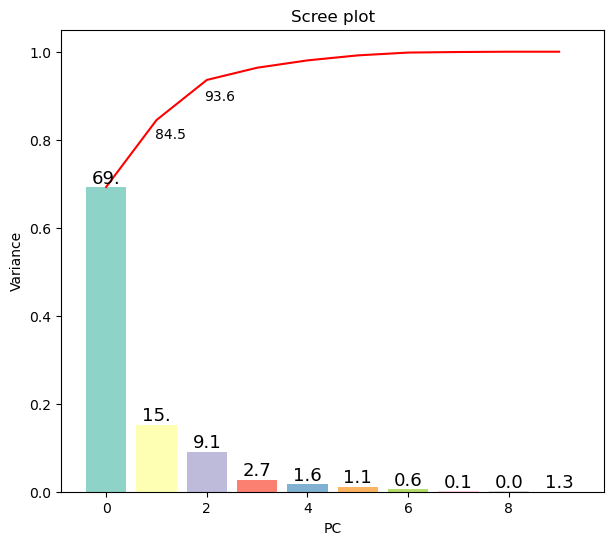

In [42]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    fig, ax = plt.subplots(figsize=(7, 6))
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = sns.color_palette('Set3'))
    ax.plot(ind, cumvals, color = 'r')
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
    
    plt.text(ind[1]*0.97, cumvals[1]*0.95, '%.1f'%(cumvals[1]*100))
    plt.text(ind[2]*0.97, cumvals[2]*0.95, '%.1f'%(cumvals[2]*100))

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

  
scree_plot(pca)

In [43]:
model_ln_pca=LinearRegression() # initialzing the model
model_ln_pca.fit(X_train_pca, y_train_pca)

ln_r2_train_pca, ln_mae_train_pca, ln_mse_train_pca, ln_rmse_train_pca = get_metrics(model_ln_pca, X_train_pca, y_train)
print('='*100)
ln_r2_test_pca, ln_mae_test_pca, ln_mse_test_pca, ln_rmse_test_pca = get_metrics(model_ln_pca, X_test_pca, y_test_pca)

r2_score                 : 0.5423455149411316
Mean Absolute Error      : 1.5791021800342018
Mean Squared Error       : 4.83708241891222
Root Mean Squared Error  : 2.1993368134308624
Acc is 461     0.999996
2835    0.999929
1378    0.999990
2569    0.999911
369     0.999969
          ...   
4173    0.999999
3328    0.999942
3879    0.999907
3607    0.999980
2130    0.999951
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.5148521256465797
Mean Absolute Error      : 1.5983310376792337
Mean Squared Error       : 4.695725147197393
Root Mean Squared Error  : 2.166962193301349
Acc is 2197    0.999748
3662    0.999701
1266    0.999899
485     0.999908
2083    0.999895
          ...   
1565    0.999816
2833    0.999973
4005    0.999939
3318    0.999436
2865    0.999236
Name: Rings, Length: 836, dtype: float64


In [44]:
model_rf_pca = RandomForestRegressor (random_state=42)
model_rf_pca.fit(X_train_pca, y_train_pca)

rf_r2_train_pca, rf_mae_train_pca, rf_mse_train_pca, rf_rmse_train_pca = get_metrics(model_rf_pca, X_train_pca, y_train_pca)
print('='*100)
rf_r2_test_pca, rf_mae_test_pca, rf_mse_test_pca, rf_rmse_test_pca = get_metrics(model_rf_pca, X_test_pca, y_test_pca)

r2_score                 : 0.9392845725693405
Mean Absolute Error      : 0.5574558515414547
Mean Squared Error       : 0.64171888656091
Root Mean Squared Error  : 0.8010735837367938
Acc is 461     0.999990
2835    0.999970
1378    0.999986
2569    0.999973
369     0.999982
          ...   
4173    0.999999
3328    0.999978
3879    0.999973
3607    0.999979
2130    0.999983
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.5517826885393711
Mean Absolute Error      : 1.498732057416268
Mean Squared Error       : 4.338275837320574
Root Mean Squared Error  : 2.082852812207472
Acc is 2197    0.999764
3662    0.999740
1266    0.999850
485     0.999879
2083    0.999947
          ...   
1565    0.999838
2833    0.999930
4005    0.999930
3318    0.999913
2865    0.999333
Name: Rings, Length: 836, dtype: float64


In [45]:
model_gb_pca = GradientBoostingRegressor (random_state=42)
model_gb_pca.fit(X_train_pca, y_train_pca)

gb_r2_train_pca, gb_mae_train_pca, gb_mse_train_pca, gb_rmse_train_pca = get_metrics(model_gb_pca, X_train_pca, y_train_pca)
print('='*100)
gb_r2_test_pca, gb_mae_test_pca, gb_mse_test_pca, gb_rmse_test_pca = get_metrics(model_gb_pca, X_test_pca, y_test_pca)

r2_score                 : 0.7008081729197744
Mean Absolute Error      : 1.2891901607975564
Mean Squared Error       : 3.162244824205816
Root Mean Squared Error  : 1.778270177505605
Acc is 461     0.999984
2835    0.999946
1378    0.999986
2569    0.999920
369     0.999964
          ...   
4173    0.999993
3328    0.999959
3879    0.999898
3607    0.999972
2130    0.999954
Name: Rings, Length: 3341, dtype: float64
r2_score                 : 0.549735244623609
Mean Absolute Error      : 1.5067491454247175
Mean Squared Error       : 4.358092957813029
Root Mean Squared Error  : 2.0876045980532396
Acc is 2197    0.999751
3662    0.999701
1266    0.999839
485     0.999882
2083    0.999971
          ...   
1565    0.999851
2833    0.999966
4005    0.999953
3318    0.999847
2865    0.999324
Name: Rings, Length: 836, dtype: float64


In [46]:
metrics_df = pd.DataFrame({
    'score_name' : [
                    'R2', 'R2', 
                    'R2', 'R2', 
                    'R2', 'R2', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    'Mean Squared Error', 'Mean Squared Error', 
                    ],
    'model_name' : [
                    'Linear Regression', 'Linear Regression', 
                    'Random Forest', 'Random Forest', 
                    'Gradient Boosting', 'Gradient Boosting', 
                    'Linear Regression', 'Linear Regression', 
                    'Random Forest', 'Random Forest', 
                    'Gradient Boosting', 'Gradient Boosting', 
                    ],
    'data_name' : [
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    'Train', 'Test', 
                    ],
    'Whole Features' : [
                    ln_mse_train, ln_mse_test,
                    rf_mse_train, rf_mse_test,
                    gb_mse_train, gb_mse_test,
                    ln_r2_train, ln_r2_test,
                    rf_r2_train, rf_r2_test,
                    gb_r2_train, gb_r2_test,
                        ],
    'PCA of Whole Features' : [
                    ln_mse_train_pca, ln_mse_test_pca,
                    rf_mse_train_pca, rf_mse_test_pca,
                    gb_mse_train_pca, gb_mse_test_pca,
                    ln_r2_train_pca, ln_r2_test_pca,
                    rf_r2_train_pca, rf_r2_test_pca,
                    gb_r2_train_pca, gb_r2_test_pca,
                                ],
})
metrics_df = metrics_df.set_index(['score_name','model_name','data_name'])

metrics_df.style.background_gradient(axis=1)

In [47]:
csv_path='abalone_clean.csv'

X_train, X_test, y_train, y_test = load_dataset1(csv_path)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3341, 10) (836, 10) (3341,) (836,)


In [48]:
#Evaluation Metrics
def regressor(model):
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_test, y_test))

In [49]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
regressor(model)

Learning rate set to 0.04954


0:	learn: 3.1887442	total: 139ms	remaining: 2m 18s
1:	learn: 3.1318016	total: 141ms	remaining: 1m 10s
2:	learn: 3.0795290	total: 143ms	remaining: 47.6s
3:	learn: 3.0247533	total: 145ms	remaining: 36s
4:	learn: 2.9745074	total: 146ms	remaining: 29.1s
5:	learn: 2.9257864	total: 148ms	remaining: 24.4s
6:	learn: 2.8854555	total: 150ms	remaining: 21.3s
7:	learn: 2.8468187	total: 152ms	remaining: 18.8s
8:	learn: 2.8086738	total: 153ms	remaining: 16.9s
9:	learn: 2.7706005	total: 155ms	remaining: 15.3s
10:	learn: 2.7390546	total: 156ms	remaining: 14s
11:	learn: 2.7074676	total: 159ms	remaining: 13.1s
12:	learn: 2.6800336	total: 161ms	remaining: 12.2s
13:	learn: 2.6526382	total: 162ms	remaining: 11.4s
14:	learn: 2.6312261	total: 163ms	remaining: 10.7s
15:	learn: 2.6066406	total: 165ms	remaining: 10.1s
16:	learn: 2.5871895	total: 166ms	remaining: 9.62s
17:	learn: 2.5687916	total: 168ms	remaining: 9.16s
18:	learn: 2.5495435	total: 169ms	remaining: 8.75s
19:	learn: 2.5314798	total: 171ms	remaining

In [50]:
y_pred=model.predict(X_test)
Acc=pd.DataFrame({'Actual_y_value':y_test,'Predicted_y_value':y_pred})
Acc

,Actual_y_value,Predicted_y_value
2197,10.0,8.024496
3662,8.0,8.815840
1266,9.0,8.020071
485,13.0,12.345814
2083,11.0,11.857257
...,...,...
1565,7.0,8.110719
2833,9.0,9.550560
4005,9.0,8.949277
3318,4.0,4.509870


In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.5369907604897377
Mean Squared Error: 4.702296594875869
Root Mean Squared Error: 2.1684779442908497


In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor (n_estimators=30, random_state=42)
regressor(model)

Accuracy: 0.4804117232617048


In [53]:
import xgboost as xgb
model = xgb.XGBRegressor()
regressor(model)

Accuracy: 0.45388138858904925
